In [1]:
import matplotlib.pyplot as plt
from utils import get_params_from_file as get_params, get_metrics_from_file as get_metrics, get_all_params, comm_dict, get_pandas_dataframe

C:\ProgramData\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [90]:
prefix = "history"
filenames = ["history8.txt", 
             "history9.3.txt",
             "history6.txt"]
filenames = [prefix+'/'+f for f in filenames]

In [91]:
acc = [get_metrics(f, "acc")  for f in filenames]
loss = [get_metrics(f, "loss") for f in filenames]
val_acc = [get_metrics(f, "val_acc") for f in filenames]
val_loss = [get_metrics(f, "val_loss") for f in filenames]

In [92]:
title = [get_params(f, "save_model_name", with_name = False) for f in filenames]
title = [t[t.index('/')+1:-3] for t in title]

In [93]:
params = [get_all_params(f, False, False, 
                        "input_shape", 
                        "batch_size", 
                        "epochs", 
                        "learning_rate", 
                        "l2", 
                        "all_examples", 
                        "train_examples", 
                        "test_examples") for f in filenames]
for i in range(len(params)):
    params[i]["Accuracy"] = acc[i][-1]
    params[i]["Val Accuracy"] = val_acc[i][-1]
    params[i]["Loss"] = loss[i][-1]
    params[i]["Val Loss"] = val_loss[i][-1]

In [94]:
all_params = get_pandas_dataframe(comm_dict(params, title))

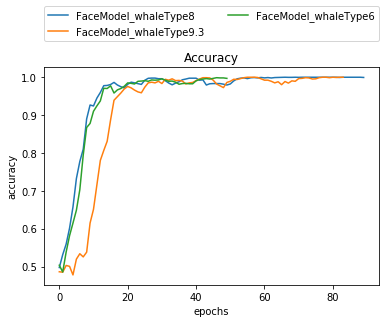

,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,100,200,200
epochs,50,90,84
learning_rate,0.001,0.001,0.001
l2,0.0001,0.0001,0.0001
all_examples,2100,4500,2100
train_examples,1680,3600,1680
test_examples,420,900,420
Accuracy,0.997024,0.999444,1
Val Accuracy,0.838095,0.814444,0.840476


In [95]:
[plt.plot(a, label = t) for a,t in zip(acc,title)]
plt.ylabel("accuracy")
plt.xlabel("epochs")
#plt.legend(handles = [a1,a2])
plt.title("Accuracy")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)
plt.show()
all_params

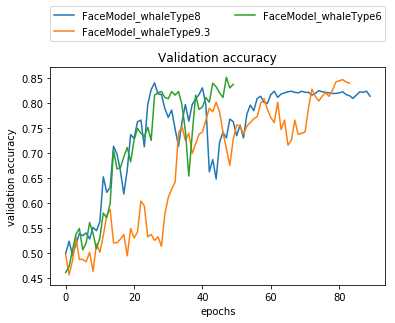

,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,100,200,200
epochs,50,90,84
learning_rate,0.001,0.001,0.001
l2,0.0001,0.0001,0.0001
all_examples,2100,4500,2100
train_examples,1680,3600,1680
test_examples,420,900,420
Accuracy,0.997024,0.999444,1
Val Accuracy,0.838095,0.814444,0.840476


In [96]:
[plt.plot(a, label = t) for a,t in zip(val_acc,title)]
plt.ylabel("validation accuracy")
plt.xlabel("epochs")
plt.title("Validation accuracy")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)
plt.show()
all_params

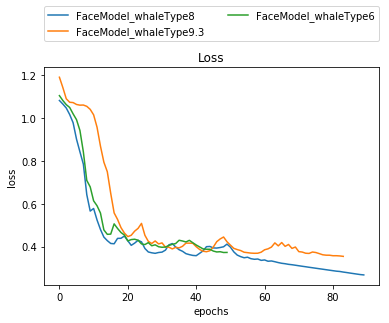

,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,100,200,200
epochs,50,90,84
learning_rate,0.001,0.001,0.001
l2,0.0001,0.0001,0.0001
all_examples,2100,4500,2100
train_examples,1680,3600,1680
test_examples,420,900,420
Accuracy,0.997024,0.999444,1
Val Accuracy,0.838095,0.814444,0.840476


In [97]:
[plt.plot(a, label = t) for a,t in zip(loss,title)]
plt.ylabel("loss")
plt.xlabel("epochs")
plt.title("Loss")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)
plt.show()
all_params

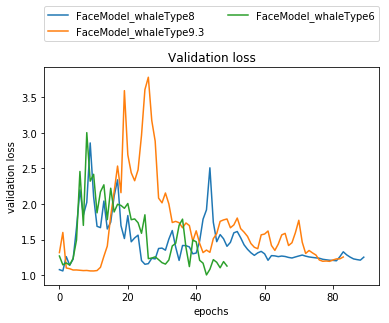

,FaceModel_whaleType6,FaceModel_whaleType8,FaceModel_whaleType9.3
input_shape,"(96, 96, 1)","(96, 96, 1)","(96, 96, 1)"
batch_size,100,200,200
epochs,50,90,84
learning_rate,0.001,0.001,0.001
l2,0.0001,0.0001,0.0001
all_examples,2100,4500,2100
train_examples,1680,3600,1680
test_examples,420,900,420
Accuracy,0.997024,0.999444,1
Val Accuracy,0.838095,0.814444,0.840476


In [98]:
[plt.plot(a, label = t) for a,t in zip(val_loss,title)]
plt.ylabel("validation loss")
plt.xlabel("epochs")
plt.title("Validation loss")
plt.legend(bbox_to_anchor=(0., 1.12, 1., .102), loc=3,          ncol=2, mode="expand", borderaxespad=0.)
plt.show()
all_params